# Import Library

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load Dataset

In [3]:
path_1 = 'gdrive/My Drive/DigitalSkola/Dataset/order_details.csv'
path_2 = 'gdrive/My Drive/DigitalSkola/Dataset/order_lists.csv'

details = pd.read_csv(path_1)
lists = pd.read_csv(path_2)

In [4]:
# Join Dataset
dataset = pd.merge(details, lists, how='right', on='order_id')
dataset.head()

,order_id,sales,profit,quantity,category,sub_category,Cost,Total_Cost,Total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-1029887,85,15,2,Furniture,Furnishings,70,70,30,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339696
1,AZ-2011-1029887,26,7,2,Office Supplies,Labels,19,19,14,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339696
2,AZ-2011-107716,294,109,7,Technology,Accessories,185,185,763,4/11/2011,Corey Norton,Marseille,France,Central,Consumer,4/16/2011,Economy,5.369780,43.296482
3,AZ-2011-1087704,76,11,3,Furniture,Furnishings,65,65,33,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890
4,AZ-2011-1087704,252,15,5,Office Supplies,Binders,237,237,75,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890


# Check Data Quality

In [6]:
# Missing Value
dataset.isnull().sum()

order_id         0
sales            0
profit           0
quantity         0
category         0
sub_category     0
Cost             0
Total_Cost       0
Total_profit     0
order_date       0
customer_name    0
city             0
country          0
region           0
segment          0
ship_date        0
ship_mode        0
lon              0
lat              0
dtype: int64

In [7]:
# Duplicated Value
dataset.duplicated().sum()

0

In [8]:
dataset = dataset.dropna()

In [9]:
dataset = dataset.drop_duplicates()

# Bar Chart

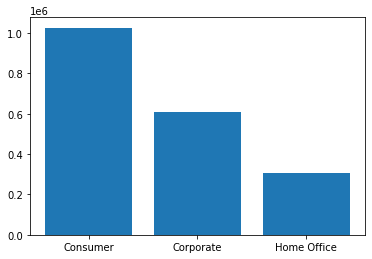

In [12]:
segment_cost = dataset.groupby(['segment']).sum()['sales']

plt.bar(segment_cost.index, segment_cost)
plt.show()

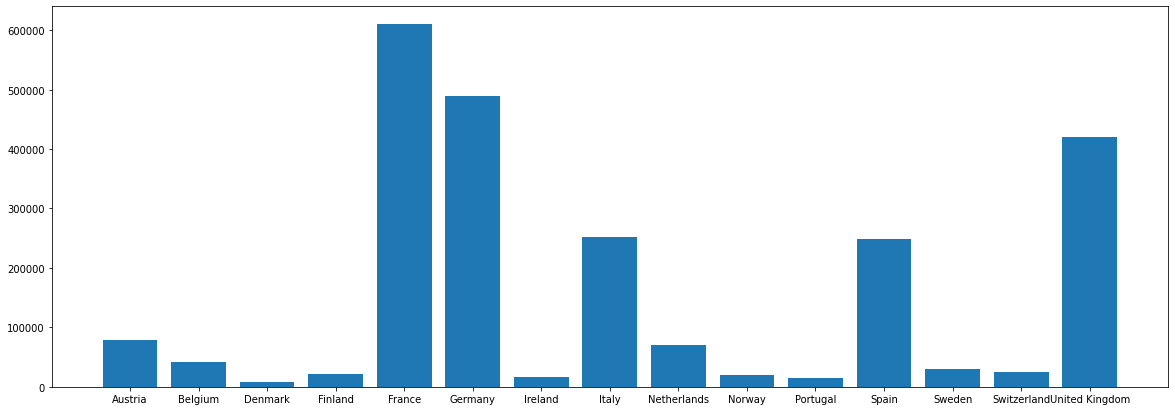

In [43]:
country_sales = (dataset.groupby(['country']).sum()['sales'])

plt.figure(figsize=(20, 7))
plt.bar(country_sales.index, country_sales)
plt.show()

# Pie Chart

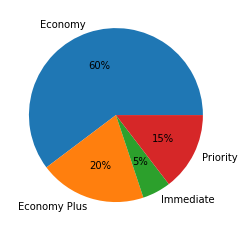

In [41]:
ship_count = dataset.groupby(['ship_mode']).count()['order_id']

plt.pie(ship_count, labels=ship_count.index, autopct='%1.0f%%')
plt.show()

# Histogram

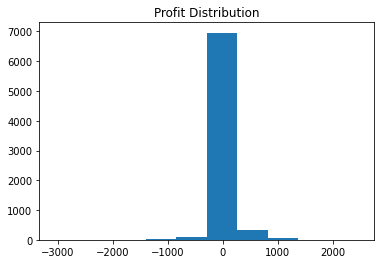

In [45]:
plt.title('Profit Distribution')
plt.hist(dataset['profit'])
plt.show()

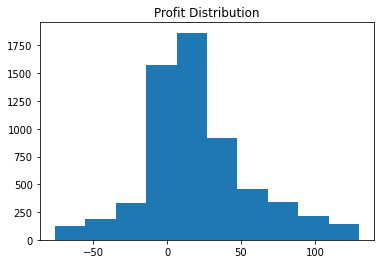

Average Profit 20.51975288570964
Median Profit 13.0


In [55]:
q1 = np.quantile(dataset['profit'], 0.25, axis=0)
q3 = np.quantile(dataset['profit'], 0.75, axis=0)

iqr = (q3 - q1) * 1.5
lower = q1 - iqr
upper = q3 + iqr

profit = dataset.loc[(dataset['profit'] > lower) & (dataset['profit'] < upper), 'profit']

plt.title('Profit Distribution')
plt.hist(profit)
plt.show()
print('Average Profit', profit.mean())
print('Median Profit', profit.median())

# Distribution/Density Plot

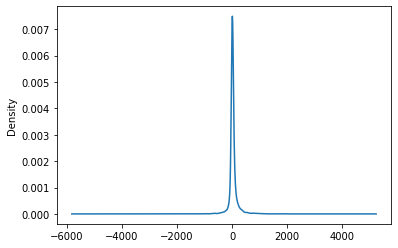

In [56]:
dataset['profit'].plot.density()
plt.show()

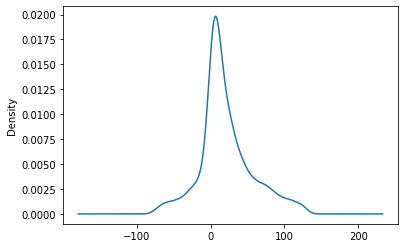

In [57]:
profit.plot.density()
plt.show()

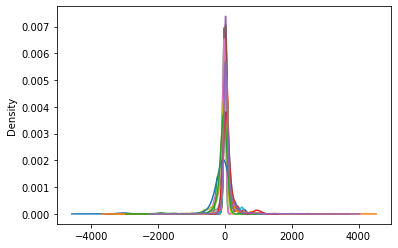

In [61]:
dataset.groupby('country')['profit'].plot.density()
plt.show()

# Line Chart

In [62]:
 dataset.head()

,order_id,sales,profit,quantity,category,sub_category,Cost,Total_Cost,Total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-1029887,85,15,2,Furniture,Furnishings,70,70,30,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339696
1,AZ-2011-1029887,26,7,2,Office Supplies,Labels,19,19,14,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339696
2,AZ-2011-107716,294,109,7,Technology,Accessories,185,185,763,4/11/2011,Corey Norton,Marseille,France,Central,Consumer,4/16/2011,Economy,5.369780,43.296482
3,AZ-2011-1087704,76,11,3,Furniture,Furnishings,65,65,33,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890
4,AZ-2011-1087704,252,15,5,Office Supplies,Binders,237,237,75,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890


In [71]:
# https://www.journaldev.com/23365/python-string-to-datetime-strptime

dataset.order_date = pd.to_datetime(dataset.order_date, format='%m/%d/%Y')
dataset.ship_date = pd.to_datetime(dataset.ship_date, format='%m/%d/%Y')

In [99]:
time_series = dataset.groupby(['order_date']).sum()['sales'].reset_index()
time_series = time_series.loc[(time_series['order_date']>='2014-01-01') & (time_series['order_date']<='2014-12-31')]

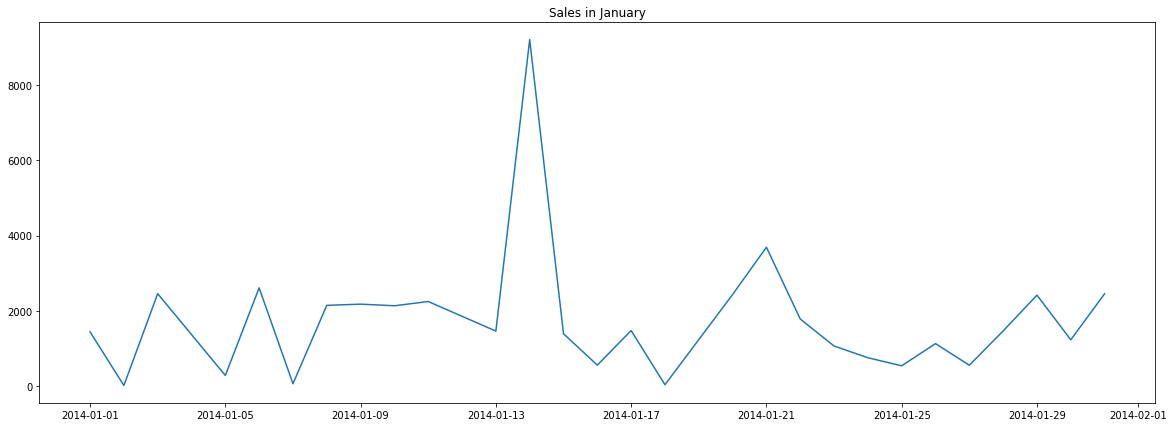

In [76]:
plt.figure(figsize=(20, 7))
plt.title('Sales in January')
plt.plot(time_series.order_date, time_series.sales)
plt.show()

In [100]:
time_series['order_dow'] = time_series['order_date'].dt.dayofweek

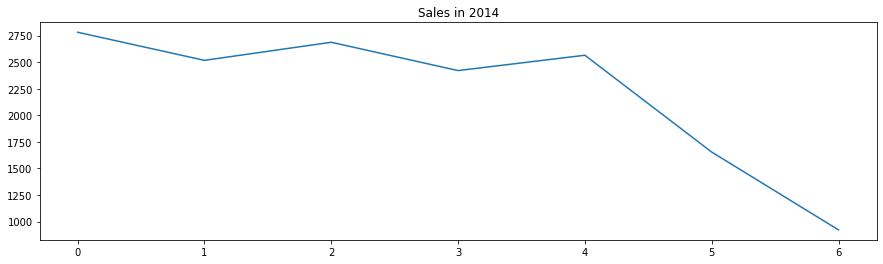

In [102]:
dow = time_series.groupby(['order_dow']).mean()['sales']

plt.figure(figsize=(15, 4))
plt.title('Sales in 2014')
plt.plot(dow.index, dow)
plt.show()

# Seaborn

In [104]:
import seaborn as sns
dataset.head()

,order_id,sales,profit,quantity,category,sub_category,Cost,Total_Cost,Total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-1029887,85,15,2,Furniture,Furnishings,70,70,30,2011-07-31,Brooke Hodgson,Leipzig,Germany,Central,Consumer,2011-08-03,Economy Plus,12.373075,51.339696
1,AZ-2011-1029887,26,7,2,Office Supplies,Labels,19,19,14,2011-07-31,Brooke Hodgson,Leipzig,Germany,Central,Consumer,2011-08-03,Economy Plus,12.373075,51.339696
2,AZ-2011-107716,294,109,7,Technology,Accessories,185,185,763,2011-04-11,Corey Norton,Marseille,France,Central,Consumer,2011-04-16,Economy,5.369780,43.296482
3,AZ-2011-1087704,76,11,3,Furniture,Furnishings,65,65,33,2011-09-15,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,2011-09-19,Economy,8.403653,49.006890
4,AZ-2011-1087704,252,15,5,Office Supplies,Binders,237,237,75,2011-09-15,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,2011-09-19,Economy,8.403653,49.006890


# Bar Chart

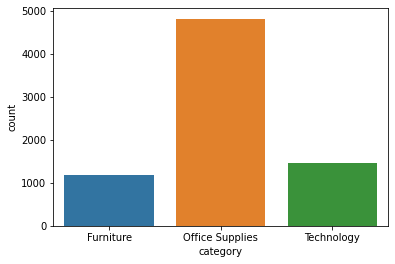

In [107]:
sns.countplot(data=dataset, x='category')
plt.show()

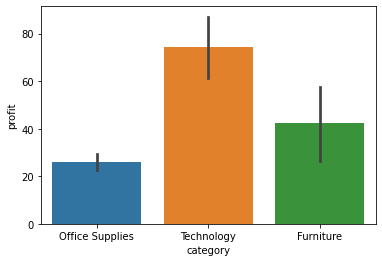

In [118]:
sns.barplot(data=dataset, x='category', y='profit', estimator=np.mean
            , order=['Office Supplies', 'Technology', 'Furniture'])
plt.show()

# Scatter Plot

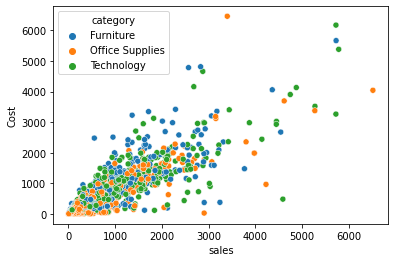

In [132]:
sns.scatterplot(data=dataset, x='sales', y='Cost', hue='category')
plt.show()

# Heatmap Chart

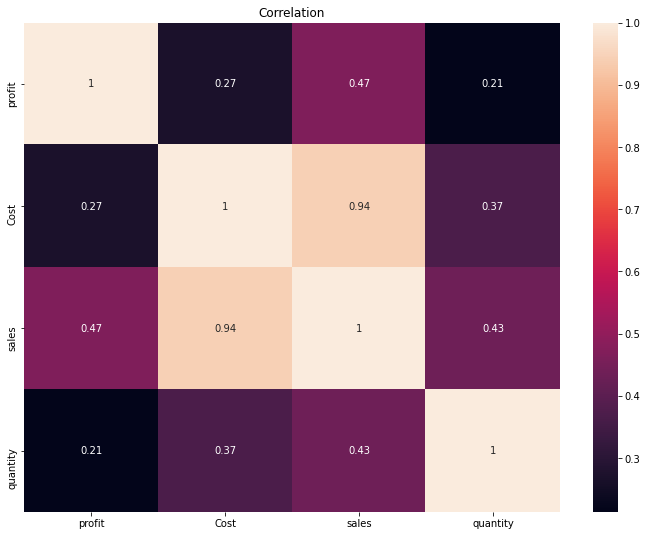

In [138]:
data_corr = dataset[['profit', 'Cost', 'sales', 'quantity']].corr(method='spearman')

plt.figure(figsize=(12, 9))
plt.title('Correlation')
sns.heatmap(data_corr, annot=True)
plt.show()

# Violin Plot

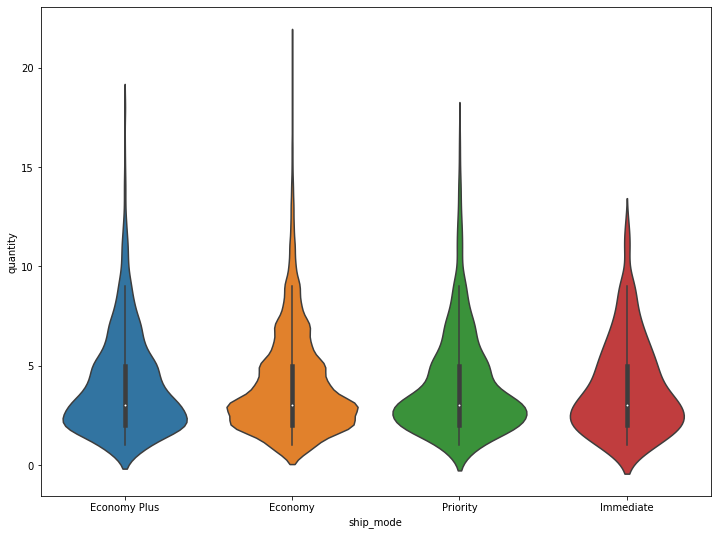

In [143]:
plt.figure(figsize=(12, 9))
sns.violinplot(data=dataset, y='quantity', x='ship_mode')
plt.show()

# Swarmplot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


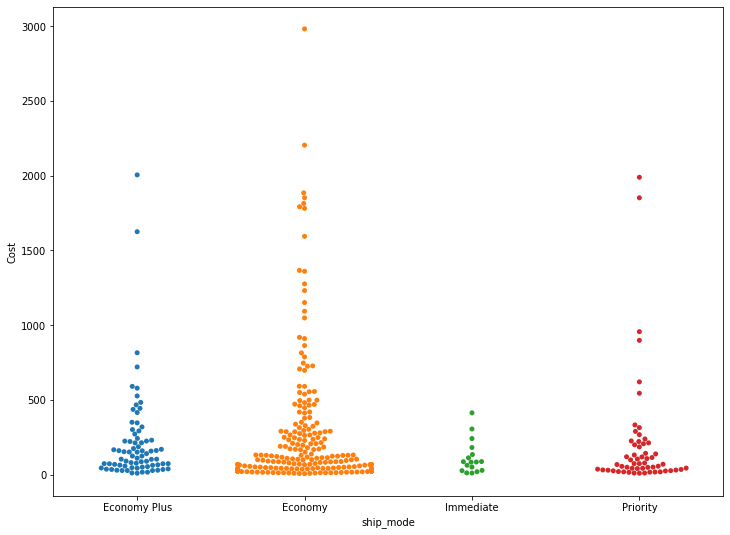

In [149]:
plt.figure(figsize=(12, 9))
sns.swarmplot(data=dataset.sample(frac=0.05), y='Cost', x='ship_mode')
plt.show()

# Boxplot

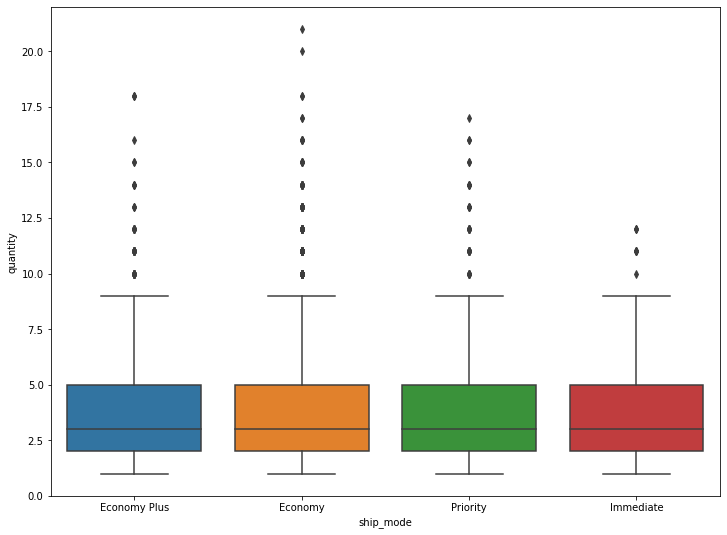

In [147]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=dataset, y='quantity', x='ship_mode')
plt.show()

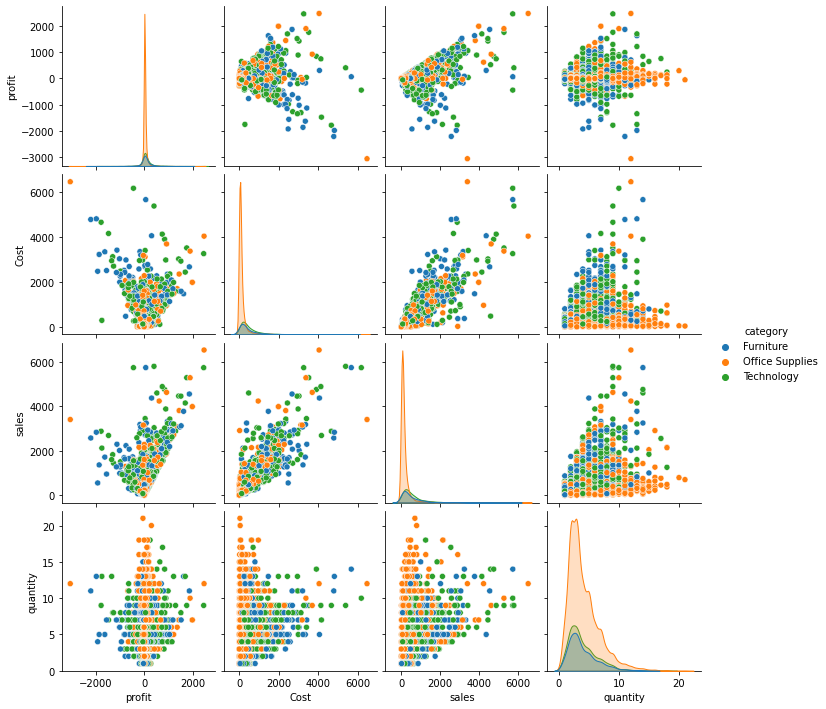

In [152]:
numerical = dataset[['category','profit', 'Cost', 'sales', 'quantity']]

sns.pairplot(numerical, hue='category')
plt.show()